In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [3]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 重みパラメータ、バイアスの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        print(str(loss))

train acc, test acc | 0.11236666666666667, 0.1135
2.290234124644517
train acc, test acc | 0.7865666666666666, 0.7939
0.737842175851734
train acc, test acc | 0.87605, 0.8799
0.5051815214331667
train acc, test acc | 0.8993833333333333, 0.9011
0.3566809771239216
train acc, test acc | 0.90805, 0.9115
0.3244472571708195
train acc, test acc | 0.9153833333333333, 0.9177
0.27998038581018625
train acc, test acc | 0.9203833333333333, 0.9202
0.35268391956182965
train acc, test acc | 0.9240333333333334, 0.9261
0.23612063493011648
train acc, test acc | 0.9285666666666667, 0.9267
0.20876682495330715
train acc, test acc | 0.9316833333333333, 0.9305
0.23574154154764446
train acc, test acc | 0.9348, 0.9328
0.2262075770369241
train acc, test acc | 0.9374833333333333, 0.9362
0.1785912499275161
train acc, test acc | 0.94005, 0.9389
0.23419874949843522
train acc, test acc | 0.9422666666666667, 0.9392
0.20256300976359656
train acc, test acc | 0.9444166666666667, 0.9414
0.17981713057913226
train acc, test ac

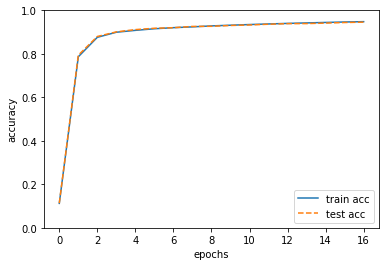

In [4]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

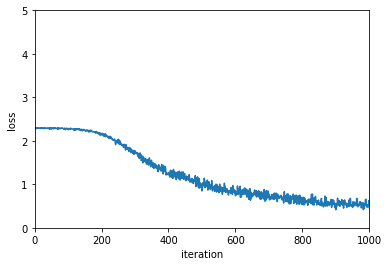

In [5]:
xx = np.arange(0,10000,1)
yy=train_loss_list
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 5)
plt.xlim(0, 1000)
plt.plot(xx,yy)
plt.show()